In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

3-3

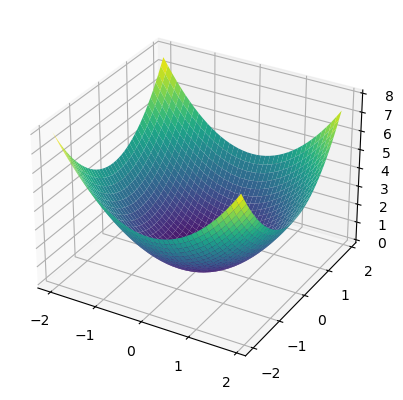

In [20]:
x, y = np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x, y)

Z =X**2 + Y**2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()

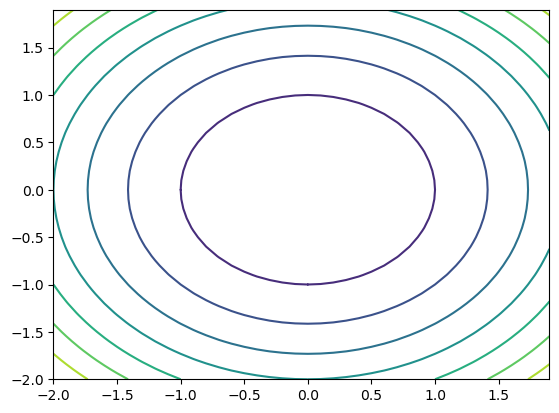

In [23]:
ax = plt.axes()
ax.contour(X, Y, Z)
plt.show()

In [24]:
def multivariate_normal(x, mu, cov):
    
    inv = np.linalg.inv(cov)
    D = len(x) #次元
    y = 1.0 / np.sqrt((2.0 * np.pi)**D * np.linalg.det(cov)) \
      * np.exp(-0.5 * (x - mu).T @ inv @ (x - mu))
    
    return y

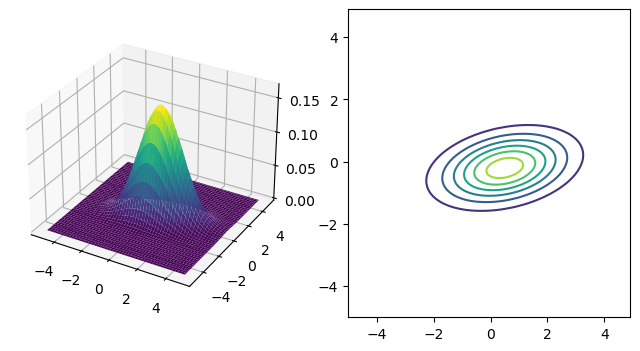

In [33]:
mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3], 
                [0.3, 0.5]])

xs = ys = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)


fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z)

plt.show()

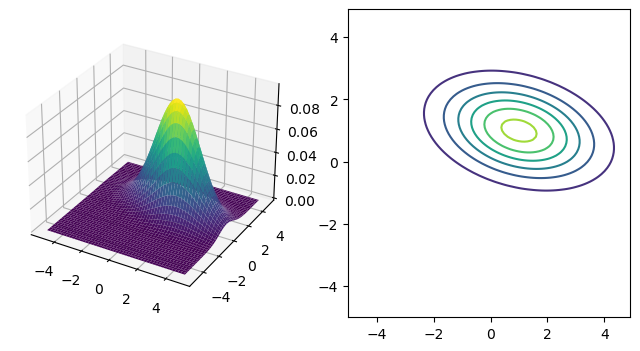

In [38]:
mu = np.array([1.0, 1.0])
cov = np.array([[3.0, -0.5], 
                [-0.5, 1.0]])

xs = ys = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)


fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z)

plt.show()

In [41]:
np.random.seed(0)

N = 10000
D = 2 
xs = np.random.rand(N, D)

mu = np.mean(xs, axis=0)

cov = 0.0
for n in range(N):
    x = xs[n]
    z = x - mu 
    z = z[:, np.newaxis]
    cov += z @ z.T

cov /= N 

print(mu)
print(cov)

[0.49443495 0.49726356]
[[ 0.08476319 -0.00023128]
 [-0.00023128  0.08394656]]


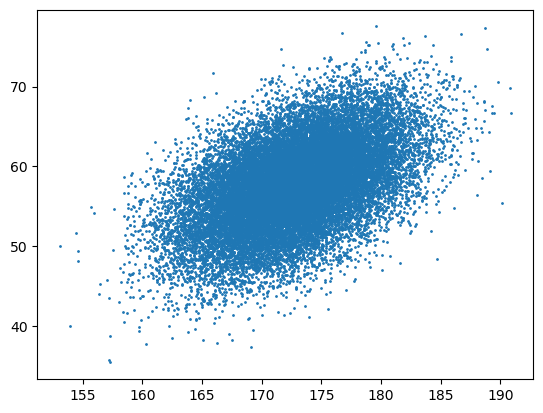

In [45]:
xs = np.loadtxt("height_weight.txt")

plt.scatter(xs[:, 0], xs[:, 1], s=1)
plt.show()

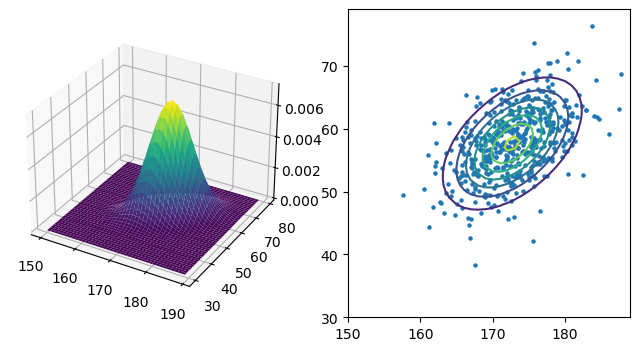

In [52]:
x, y = np.arange(150, 190, 1), np.arange(30, 80, 1)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)

mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)


for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)


fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(122)
ax2.scatter(xs[:500, 0], xs[:500, 1], s=5)
ax2.contour(X, Y, Z)

plt.show()